# SYK Hamiltonian Construction

Now that I have a pretty good (working) function that calculates entanglement entropy, I can now try to construct the SYK hamiltonian to see the time evolution of the states of qubits and how the entanglement entropy changes overtime.

Therefore, we would want to write the unitary operator with the SYK Hamiltonian and apply it to some random initial states of qubits.

The SYK model is a 0+1 dimensional model of $N \gg 1$ fermions with an all-to-all random quartic interaction. The mild generalization of a q-body Hamiltonian for this model is written as follows,

$$
H = i^{q/2} \sum_{1 \le i_1 < \ldots < i_q \le N} J_{i_1 \ldots i_q} \psi_{i_1}\ldots\psi_{i_q},
$$
with a variance of zero, this means that the Gaussian couplings is now,
$$
\sigma = \sqrt{(q-1)!} \frac{J}{N^{\frac{q-1}{2}}}
$$
with $ q $ as an integer. Lets try an SYK model with $q=4$, with the coupling constant following a normal Gaussian distribution with mean of $\mu = 0$ and the variance as $\sigma =\sqrt{(q-1)!}J/N^{\frac{q-1}{2}}$

We will consider 4 interacting fermions, with the coupling constant taken from a Gaussian ensemble with a mean of $\mu = 0$ and hence a variance of $\sigma = \sqrt{3!} \frac{J}{N^{3/2}}$.

$$
H = \sum_{1\le i < j < j < k \le N}^{N} J_{ijkl} \psi_i \psi_j \psi_k \psi_l.
$$
The matrix size of the coupling should be $2^{N/2} \times 2^{N/2}$.


Testing density matrix and eigenvalues to see whether or not it represents the initial states.

In [1]:
import numpy as np

In [2]:
def psi_initial_random_state_uniform(nQubits = 8, min_val = 0, max_val = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the statevector.

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    uniform_ensemble = np.random.uniform(min_val, max_val, size = (2**nQubits, 1))
    normalized_uniform_ensemble = uniform_ensemble / np.linalg.norm(uniform_ensemble)
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    return normalized_uniform_ensemble

In [3]:
uniform_statevector = psi_initial_random_state_uniform(3, 0, 1)
print(uniform_statevector)
herm_conj_uniform_statevector = np.transpose(uniform_statevector)

[[0.06507978]
 [0.41392952]
 [0.16305196]
 [0.50226287]
 [0.4185751 ]
 [0.34123214]
 [0.34786034]
 [0.36458434]]


In [4]:
density_matrix = np.matmul(uniform_statevector, herm_conj_uniform_statevector)
print(density_matrix)

[[0.00423538 0.02693844 0.01061138 0.03268716 0.02724077 0.02220731
  0.02263867 0.02372707]
 [0.02693844 0.17133765 0.06749202 0.20790143 0.17326059 0.14124605
  0.14398966 0.15091222]
 [0.01061138 0.06749202 0.02658594 0.08189494 0.06824949 0.05563857
  0.05671931 0.05944619]
 [0.03268716 0.20790143 0.08189494 0.25226799 0.21023473 0.17138823
  0.17471733 0.18311718]
 [0.02724077 0.17326059 0.06824949 0.21023473 0.17520512 0.14283128
  0.14560568 0.15260593]
 [0.02220731 0.14124605 0.05563857 0.17138823 0.14283128 0.11643937
  0.11870113 0.12440789]
 [0.02263867 0.14398966 0.05671931 0.17471733 0.14560568 0.11870113
  0.12100681 0.12682443]
 [0.02372707 0.15091222 0.05944619 0.18311718 0.15260593 0.12440789
  0.12682443 0.13292174]]


In [5]:
eigenvalue, eigenvector = np.linalg.eig(density_matrix)
print(eigenvalue)

[ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -5.31751357e-17+0.00000000e+00j -2.56818112e-17+0.00000000e+00j
  1.88510764e-17+0.00000000e+00j  4.29480295e-18+3.06702429e-18j
  4.29480295e-18-3.06702429e-18j -2.28781117e-18+0.00000000e+00j]


idk whats happened there.

Moving on, let us create the Hamiltonian for SYK model.

from the equation,
$$
H = \sum_{1\le i < j < j < k \le N}^{N} J_{ijkl} \psi_i \psi_j \psi_k \psi_l,
$$

where we can write the fermions as qubits, which in this case it will be a series of kronecker products of statevectors in the form of column vector in python. Lets start with making a random initial state of $n$ qubits, as the initial state of the SYK system.

In [6]:
import numpy as np
# We will probably need this following function from scipy
import scipy as scp
import matplotlib.pyplot as plt

In [7]:
def psi_initial_random_state_uniform(nQubits = 8, min_val = 0, max_val = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the statevector.

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    uniform_ensemble = np.random.uniform(min_val, max_val, size = (2**nQubits, 1))
    normalized_uniform_ensemble = uniform_ensemble / np.linalg.norm(uniform_ensemble)
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    return normalized_uniform_ensemble

In [8]:
uniform_statevector = psi_initial_random_state_uniform(4, 0, 1)
print(uniform_statevector)

[[0.06918326]
 [0.25202291]
 [0.37610115]
 [0.3508013 ]
 [0.09933038]
 [0.13684663]
 [0.24149564]
 [0.05440917]
 [0.07357333]
 [0.48530144]
 [0.18782862]
 [0.29303832]
 [0.40908067]
 [0.16173106]
 [0.08382672]
 [0.12123554]]


Now that we have our initial $\ket{\psi_0}$, we will need to build the Hamiltonian, which describes how each of the 4 fermions in the system interact with each other. Note that the SYK model have an all-to-all interaction between each of the fermions in picture. 

We expect the size of the interaction coupling to be $2^{n} \times 2^{n}$ which corresponds to the size of the qubits

In [9]:
def Coupling_SYK_generator(nQubits = 8, mean = 0, std = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the coupling for an SYK model. This couplings are going to be applied to a matrix
    then inserted into an exponential 

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    gaussian_coupling = np.random.normal(mean, std, size = (2**nQubits, 2**nQubits))
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    normalized_gaussian_coupling = gaussian_coupling / np.linalg.norm(gaussian_coupling)
    return normalized_gaussian_coupling

In [10]:
coupling_constants = Coupling_SYK_generator(4, 0, 1)
print(coupling_constants)

[[ 5.19562124e-02  1.04052503e-02  6.23626916e-03  5.46176836e-02
   3.12965642e-02  3.08202244e-02  5.70412973e-03 -2.75972809e-02
  -3.68151817e-02  2.73832761e-02 -5.13157086e-02  1.30309370e-03
  -8.14969096e-02  2.57976418e-02 -2.56547327e-02  1.12598056e-02]
 [-2.38902676e-02 -5.62640960e-02 -3.22443084e-02  2.07600335e-02
   5.21738983e-02 -8.04777907e-02 -6.65014609e-02  3.31984084e-04
  -7.24910142e-02  3.84320628e-02 -8.70844801e-02  1.66023107e-02
   7.22224866e-02  3.30082659e-02 -9.30314620e-02 -6.38013351e-02]
 [-3.63974586e-02 -1.32575571e-01 -1.37036062e-01 -1.81052622e-02
   2.74120115e-02  9.45462255e-02  3.74951121e-02  2.69751679e-02
  -3.59743260e-02  5.35859615e-02  8.73176979e-02 -1.01023317e-01
  -1.25596878e-01 -8.54905498e-02 -1.23161104e-02  5.72163470e-02]
 [-2.31762681e-02  5.23704354e-02 -8.75513431e-02  2.32989105e-02
  -8.03244656e-02  5.93117034e-02 -1.85409258e-02  3.65855487e-02
  -7.22104624e-02 -2.43423794e-02  1.36597631e-01  5.59397297e-02
   6.52

I dont think that this matrix is the correct representation for the SYK couplings taken from a gaussian ensemble. Ill have to ask Junggi or Vinay.

Now that we've essentially have our Hamiltonian of $J$ coupling and each of the fermions towards each other. we can input this matrix into the following form in python,

$$
e^{iH_{SYK}t}
$$

with $i$ as the complex number and $t$ as time.

In [11]:
from scipy.linalg import expm
exponential_term = expm(1j * coupling_constants)
print(exponential_term)

[[ 9.92669381e-01+5.17440344e-02j  5.17311917e-04+9.63133892e-03j
   4.88485064e-03+5.80585513e-03j -2.22158052e-03+5.45548308e-02j
  -4.81513065e-03+3.16983133e-02j  1.16129643e-03+3.09169324e-02j
  -5.65603114e-04+5.74085227e-03j -5.16518283e-04-2.72817569e-02j
  -1.04851905e-03-3.70062111e-02j -4.13126848e-03+2.78433077e-02j
  -8.47270405e-03-5.09906013e-02j -1.35807998e-03+6.95032715e-04j
  -3.77091508e-03-8.15143263e-02j  5.31072848e-03+2.54762355e-02j
  -4.36748958e-03-2.52939495e-02j -4.57693264e-03+1.14291856e-02j]
 [ 1.63379255e-03-2.43055730e-02j  1.01055411e+00-5.61758641e-02j
  -6.28594148e-03-3.23936304e-02j -3.21756437e-03+2.14159320e-02j
  -1.61448713e-03+5.24240904e-02j -1.44148413e-02-8.07651165e-02j
   3.89488895e-03-6.68932223e-02j -4.34456276e-03-1.35544616e-04j
  -3.49214827e-03-7.26706627e-02j -4.19372549e-03+3.84820868e-02j
   4.83438705e-03-8.81508068e-02j -1.00194539e-02+1.71110335e-02j
   3.35214772e-03+7.21676525e-02j  1.87681586e-03+3.35089632e-02j
   2.1984

Now that we know that the built-in function works with numpy's complex number represented by a `1j`, we can build a function around it.

In [12]:
def unitary_operator_SYK(coupling_constant_initial, time):
    # Check if coupling_constant_initial is a square matrix
    if coupling_constant_initial.shape[0] != coupling_constant_initial.shape[1]:
        raise ValueError("coupling_constant_initial must be a square matrix.")
    
    # Check if the matrix is of size 2^nQubits x 2^nQubits
    size = coupling_constant_initial.shape[0]
    if not (size & (size - 1) == 0 and size != 0):  # Check if size is a power of 2
        raise ValueError("The size of coupling_constant_initial must be 2^nQubits x 2^nQubits.")
    
    # Check if time is non-negative
    if time < 0:
        raise ValueError("Time must be non-negative.")
    
    exponential_term = expm(-1j * coupling_constant_initial * (time+1))
    return exponential_term

In [13]:
test_unitary_op = unitary_operator_SYK(coupling_constant_initial=coupling_constants, time=4)
print(test_unitary_op.shape)
test_unitary_op_times_initial_state = test_unitary_op @ uniform_statevector
print(test_unitary_op_times_initial_state.shape)

(16, 16)
(16, 1)


We can then try to use a discretized time, such as an array or time points

In [14]:
def SYK_time_evolution(coupling_constant_initial, initial_time, final_time, interval_time):
    time_steps = np.arange(initial_time, (final_time + 1), interval_time)

    # Make a list to record the 

I think we can implement this straight to the calculation of the entanglement entropy.

Here are the necessary functions to calculate the EE

In [15]:
def Psi_indexed_v2(normalized_matrix, n_A, i, j):
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    if isinstance(i, int) and i > 0 and i <= 2**n_A and isinstance(j, int) and j > 0 and j <= 2**n_B:
        return normalized_matrix[(i - 1) * 2**n_B + (j - 1)]
    else:
        return ValueError("Indices are out of bounds or not integers")

In [16]:
def Psi_indexed_conjugate_v2(normalized_matrix, n_A, k, l):
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    if isinstance(k, int) and k > 0 and k <= 2**n_A and isinstance(l, int) and l > 0 and l <= 2**n_B:
        return np.conjugate(normalized_matrix[(k - 1) * 2**n_B + (l - 1)])
    else:
        return ValueError("Indices are out of bounds or not integers")

In [17]:
def Density_Matrix_Psi_AB_v2(normalized_matrix, n_A, i, j, k, l):
    dense_matrix = Psi_indexed_v2(normalized_matrix, n_A, i, j) * Psi_indexed_conjugate_v2(normalized_matrix, n_A, k, l)
    return dense_matrix

In [18]:
def Partial_Trace_Subsystem_B_v3(normalized_matrix, n_A, i, k):
    result = 0
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    for j in range(1, 2**n_B):
        result += Density_Matrix_Psi_AB_v2(normalized_matrix, n_A, i, j, k, j)
    return result[0]

In [19]:
def Entanglement_Entropy_lambda(eigenvalues_input):
    sum_of_EE = 0
    #epsilon = 1e-14
    for i in eigenvalues_input:
        if i > 0 :  # Ensure we don't take the log of zero
            lambda_log_lambda = i * np.log(i)
            sum_of_EE += lambda_log_lambda

    entropy = -sum_of_EE

    # Replace NaN or -inf with 0
    if np.isnan(entropy) or np.isinf(entropy):
        entropy = 0

    return entropy

In [20]:
def Entanglement_Entropy_COMBINED_uniform(normalized_statevector, n_A=1):
    PT_matrix_uniform = np.array([[Partial_Trace_Subsystem_B_v3(normalized_statevector, n_A, i+1, j+1) for j in range(2**n_A)] for i in range(2**n_A)])
    eigenval_PT_nA, eigenvec_PT_nA = np.linalg.eig(PT_matrix_uniform)
    EE_final_result = Entanglement_Entropy_lambda(eigenval_PT_nA)
    return EE_final_result

In [21]:
def plot_EE_vs_time(time_steps, EE_values):
    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, EE_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Time Steps')
    plt.ylabel('Entanglement Entropy (EE)')
    plt.title('Entanglement Entropy vs Time steps for SYK Model')
    plt.grid(True)
    plt.show()

With all of the functions above, we can proceed on making the final function to calculate the entanglement entropy over a period of time.

In [22]:
def SYK_time_evolving_EE(nQubits, mean, std, n_A, final_time, interval_time):
    
    # Make a time step for later use, when calculating the entanglement entropy of the SYK
    # model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)

    # And make a list for the result of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)

    # Make the Coupling constants for each of the fermions
    coupling_constants = Coupling_SYK_generator(nQubits=nQubits, mean=mean, std=std)

    # Now that we have the coupling constant, we can construct the following function
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=coupling_constants, time=time_i) @ SYK_initial_state
    print(unitary_operator_dict)

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)

    plot_EE_vs_time(time_steps, EE_final_list)

    return EE_final_list


{0.0: array([[ 6.62412359e-02+5.91212710e-04j],
       [ 4.85520157e-03+1.50126307e-03j],
       [ 3.57683315e-02-1.49384806e-04j],
       [ 4.24076936e-03+1.37506425e-03j],
       [ 5.48293790e-03-9.62803550e-04j],
       [ 7.14924846e-02+7.00178935e-05j],
       [ 2.95439421e-02+3.41953286e-03j],
       [ 7.49446003e-02+3.38471989e-03j],
       [ 7.03646518e-02+3.61116551e-03j],
       [ 1.63872300e-03+1.66065366e-03j],
       [ 7.18043926e-02+1.58045227e-03j],
       [ 2.54975491e-02+2.57638071e-03j],
       [ 5.41494650e-02+2.03855725e-04j],
       [ 5.09366752e-02+5.76648018e-04j],
       [ 4.54666398e-03-4.12981115e-03j],
       [ 2.94923701e-02-1.05104269e-03j],
       [ 3.41877774e-02+2.41707624e-04j],
       [ 2.31189459e-02+1.15188136e-03j],
       [ 2.87012737e-02-2.40803617e-03j],
       [ 5.95012551e-02-9.37530261e-04j],
       [ 2.98925028e-02+2.59869980e-03j],
       [ 1.21285217e-02-4.97332518e-04j],
       [ 6.40163312e-02+1.64048653e-03j],
       [ 3.00170688e-02+3.22

c:\Users\Acer Aspire 5\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


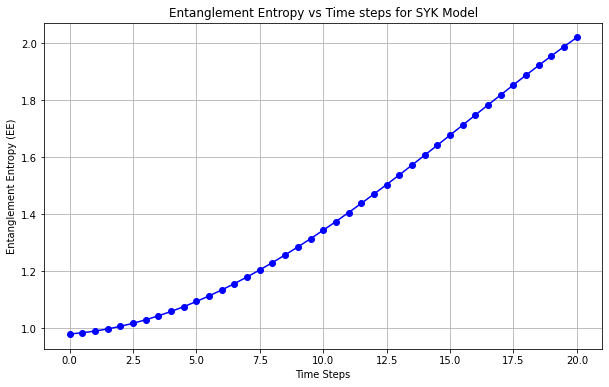

[(0.979789467357311-9.65082958297783e-18j),
 (0.9839922828623057-4.169234894449725e-18j),
 (0.9898589887736995-1.1220674658138769e-17j),
 (0.997372657517689+1.8453507543960278e-17j),
 (1.006511945294927+3.14659874740986e-17j),
 (1.0172513743929836-3.1966777648194386e-17j),
 (1.0295616459053436-1.4225306377778435e-17j),
 (1.0434099684664337-4.266948675752275e-17j),
 (1.0587603894131337+3.077827798992514e-17j),
 (1.0755741163183594-4.4031330600150954e-17j),
 (1.093809818820657-4.8417039829658636e-17j),
 (1.1134239028264907+1.3064019603768116e-17j),
 (1.1343707512744445+4.442488734939889e-19j),
 (1.1566029275740988-1.5025613698352554e-17j),
 (1.1800713394817701-2.718639604225308e-17j),
 (1.204725362517292-5.9543068179544075e-18j),
 (1.2305129230643852-5.087686286746173e-18j),
 (1.257380542058773-9.20153052955161e-18j),
 (1.285273340690961-1.3484432248807702e-17j),
 (1.3141350098761733-5.693565433996772e-18j),
 (1.343907745411761+2.869160638379539e-17j),
 (1.3745321507879833+1.189803446706

In [23]:
SYK_time_evolving_EE(nQubits=9, mean=0, std=1, n_A=3, final_time=20, interval_time=0.5)

Here, I want to test out another matrix which will represent the coupling constants, but with the diagonal elements replaced with 0. Since in theory, fermion $\psi_1$ would not have a coupling constant with it self, instead it would only have a coupling constant with all the other fermions.

In [24]:
def Coupling_SYK_generator_v2(nQubits = 8, mean = 0, std = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the coupling for an SYK model. This couplings are going to be applied to a matrix
    then inserted into an exponential 

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    gaussian_coupling = np.random.normal(mean, std, size = (2**nQubits, 2**nQubits))
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    normalized_gaussian_coupling = gaussian_coupling / np.linalg.norm(gaussian_coupling)
    # Fill the diagonals with 0
    np.fill_diagonal(normalized_gaussian_coupling, 0)
    return normalized_gaussian_coupling

In [25]:
def SYK_time_evolving_EE_v2(nQubits, mean, std, n_A, final_time, interval_time):
    
    # Make a time step for later use, when calculating the entanglement entropy of the SYK
    # model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)

    # And make a list for the result of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)

    # Make the Coupling constants for each of the fermions
    coupling_constants = Coupling_SYK_generator_v2(nQubits=nQubits, mean=mean, std=std)

    # Now that we have the coupling constant, we can construct the following function
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=coupling_constants, time=time_i) @ SYK_initial_state
    #print(unitary_operator_dict)

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)

    plot_EE_vs_time(time_steps, EE_final_list)

    return 


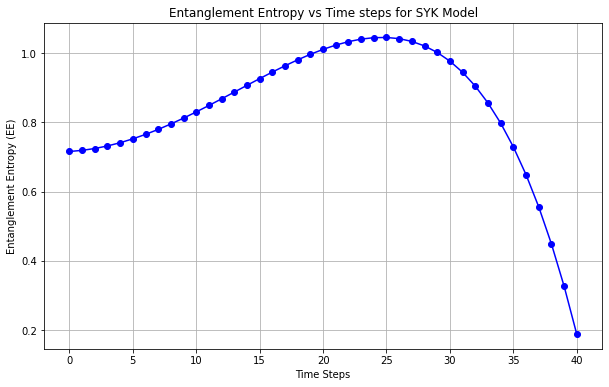

In [26]:
SYK_time_evolving_EE_v2(nQubits=10, mean=0, std=1, n_A=2, final_time=40, interval_time=1)

## Constructing the Hamilitonian (correctly)

Its good that I have done the function that calculates the entanglement entropy as a function of time, with a certain value of $n_A$ as a division of subsystem A.

First step is to construct the $\gamma$ matrices as follows,

$$
\begin{equation}
\begin{split}
\gamma_{2j-1} &= \sigma_3 \otimes \cdots \otimes \sigma_3 \otimes \sigma_1 \otimes I \otimes \cdots \otimes I,\\

\gamma_{2j} &= \sigma_3 \otimes \cdots \otimes \sigma_3 \otimes \sigma_2 \otimes I \otimes \cdots \otimes I
\end{split}
\end{equation}
$$
where $\sigma_{1,2,3}$ are Pauli matrices and $I$ a $2\times2$ identity matrix, where the $\sigma_1$ and $\sigma_2$ are located in the $j_{th}$



In [27]:
import numpy as np

In [28]:
PauliX = np.array([[0, 1],[1, 0]])

PauliY = np.array([[0, -1j],[1j, 0]])

PauliZ = np.array([[1, 0],[0, -1]])

IdMatrix = np.array([[1, 0],[0, 1]])

In [29]:
for i in range(1, 8):
    print(i)

1
2
3
4
5
6
7


In [30]:
def Gamma_odd_v2(Nfermions ,index):
    """
    Constructs a matrix based on the given number of qubits and index.
    
    Parameters:
    nQubits (int): The total number of qubits.
    index (int): The index used for constructing the matrix.
    
    Returns:
    numpy.ndarray: The resulting matrix after the construction.
    """

    if not isinstance(Nfermions, int) or Nfermions < 2:
        raise ValueError("Number of N Majorana fermions must be integer and at least 2 fermions")
    
    nQubits = int(Nfermions / 2)
    #nQubits = int(2 * Nfermions)
    
    if not isinstance(nQubits, int) or not isinstance(index, int):
        raise ValueError("Both nQubits and index must be integers.")
    if nQubits <= 0 or index <= 0:
        raise ValueError("Both nQubits and index must be positive.")
    if index > nQubits:
        raise ValueError("Index cannot be larger than nQubits.")
    
    if nQubits - index == 0:
        Third_step = PauliX
        for i in range(1, index):
            Third_step = np.kron(Third_step, IdMatrix)
        return Third_step
    else:
        First_step = PauliZ
        
        for i in range(1, nQubits - index):
            First_step = np.kron(First_step, PauliZ)

        Third_step = np.kron(First_step, PauliX)

        for i in range(1, index):
            Third_step = np.kron(Third_step, IdMatrix)
        return Third_step

In [31]:
Gamma_odd_v2(6, 2)

array([[ 0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0]])

In [32]:
Gamma_odd_v2(4, 2)

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [33]:
for i in range(1, 1):
    print(i)

In [34]:
def Gamma_even_v2(Nfermions, index):
    """
    Constructs a matrix based on the given number of fermions and index.
    
    Parameters:
    Nfermions (int): The total number of Majorana fermions.
    index (int): The index used for constructing the matrix.
    
    Returns:
    numpy.ndarray: The resulting matrix after the construction.
    """
    if not isinstance(Nfermions, int) or Nfermions < 2:
        raise ValueError("Number of Majorana fermions must be an integer and at least 2.")
    
    nQubits = int(Nfermions / 2)
    
    # Validate inputs
    if not isinstance(index, int):
        raise ValueError("Index must be an integer.")
    if nQubits <= 0 or index <= 0:
        raise ValueError("Both nQubits and index must be positive.")
    if index > nQubits:
        raise ValueError("Index cannot be larger than nQubits.")
    
    if nQubits - index == 0:
        Third_step = PauliY
        for i in range(1, index):
            Third_step = np.kron(Third_step, IdMatrix)
        return Third_step
    else:
        First_step = PauliZ
        
        for i in range(1, nQubits - index):
            First_step = np.kron(First_step, PauliZ)

        Third_step = np.kron(First_step, PauliY)

        for i in range(1, index):
            Third_step = np.kron(Third_step, IdMatrix)
        return Third_step


In [35]:
Gamma_even_v2(10, 5).shape

(32, 32)

In [36]:
Gamma_even_v2(4, 2)

array([[0.+0.j, 0.+0.j, 0.-1.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.-0.j, 0.-1.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

In [37]:
import numpy as np  

def Gamma(Nfermions, index_gamma):
    """
    Constructs a matrix based on the given number of Majorana fermions and index.
    
    Parameters:
    Nfermions (int): The total number of Majorana fermions.
    index_gamma (int): The index used for constructing the matrix.
    
    Returns:
    numpy.ndarray: The resulting matrix after the c onstruction.
    """
    
    if not isinstance(Nfermions, int) or Nfermions < 2:
        raise ValueError("Number of N Majorana fermions must be an integer and at least 2.")
    
    nQubits = int(Nfermions / 2)
    
    # Validate inputs
    if not isinstance(index_gamma, int):
        raise ValueError("Index must be an integer.")
    if nQubits <= 0 or index_gamma <= 0:
        raise ValueError("Both nQubits and index must be positive.")
    if index_gamma > Nfermions:
        raise ValueError("Index cannot be larger than Nfermions.")
    
    if index_gamma % 2 == 1:  # Odd index
        index = int((index_gamma + 1)/2)
        if nQubits - index == 0:
            Third_step = PauliX
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step
        else:
            First_step = PauliZ
            for i in range(1, nQubits - index):
                First_step = np.kron(First_step, PauliZ)
            Third_step = np.kron(First_step, PauliX)
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step
    else:  # Even index
        index = int(index_gamma / 2)
        if nQubits - index == 0:
            Third_step = PauliY
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step
        else:
            First_step = PauliZ
            for i in range(1, nQubits - index):
                First_step = np.kron(First_step, PauliZ)
            Third_step = np.kron(First_step, PauliY)
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step


In [38]:
resulting_matrix = Gamma(4, 1)
print(resulting_matrix)

[[ 0  1  0  0]
 [ 1  0  0  0]
 [ 0  0  0 -1]
 [ 0  0 -1  0]]


Now that we have constructed the gamma matrices, let's test out the anticommutation relation,

$$
\chi_j = \frac{1}{\sqrt{2}} \gamma_j
$$

where $j$ goes from $1$ to $N = 2\times nQubits$ or just $2n$ for short. Fermi oscillators are defined below,

$$
\begin{equation}\begin{split}
b_j &= \frac{1}{2} (\gamma_{2j-1} - i\gamma_{2j}),\\
\bar{b}_j &= \frac{1}{2} (\gamma_{2j-1} + i\gamma_{2j})
\end{split}\end{equation}
$$

Defining the Fermi Oscillator to check the anti-commutation relation of the gamma matrices.

In [39]:
def fermi_oscillator(Nfermions, index):
    b_j = 1/2 * (Gamma_odd_v2(Nfermions=Nfermions, index=index) - 1j * Gamma_even_v2(Nfermions=Nfermions, index=index))
    return b_j

In [40]:
fermi_oscillator(4, 1)

array([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j]])

In [41]:
def fermi_oscillator_conj(Nfermions, index):
    b_j = 1/2 * (Gamma_odd_v2(Nfermions=Nfermions, index=index) + 1j * Gamma_even_v2(Nfermions=Nfermions, index=index))
    return b_j

Lets test out the anticommutator relation
$$
\{ b_j, \bar{b}_k \} = \delta_{jk}
$$

In [42]:
(fermi_oscillator(6, 2) @ fermi_oscillator_conj(6, 2)) + (fermi_oscillator_conj(6, 2) @ fermi_oscillator(6, 2))

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

Since the index above are the same, it should result in a non-zero result. aka 1

$$
\{b_{1}, \bar{b}_1 \} = \delta_{11} = 1
$$

In [43]:
(fermi_oscillator(6, 1) @ fermi_oscillator_conj(6, 2)) + (fermi_oscillator_conj(6, 2) @ fermi_oscillator(6, 1))

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

The end result is now a 0 when the two index is different, following the anti-commutation relation.

$$
\{b_{1}, \bar{b}_2 \} = \delta_{12} = 0
$$


In [44]:
def Hamiltonian_SYK_4(Nfermions, index, coupling_constant, var_scaling):
    nQubits = int(Nfermions / 2)
    std = np.sqrt(np.math.factorial(3) * ((coupling_constant)**2 / (var_scaling**(3))))
    J_coupling_constants = np.random.normal(loc=0, scale=std, size=(2*nQubits, 2*nQubits, 2*nQubits, 2*nQubits))
       
    

From chatgpt

The dot product results the hamiltonian to output a scalar instead of a matrix a size of $2^n \times 2^n$

Still not the right result, lets try something else,

In [45]:
import numpy as np
from itertools import combinations

def h_syk(Nfermions, coupling_constant):
    """
    Compute the SYK Hamiltonian H_{SYK}.

    Parameters:
    N (int): Number of Majorana fermions.
    J (numpy.ndarray): 4-dimensional array of coupling constants J_{ijkl}.
    chi (list of numpy.ndarray): List of Majorana fermion operators chi_i.

    Returns:
    h_syk (2**n x 2**n) : The SYK Hamiltonian.
    """
    dim = 2**(Nfermions // 2)
    H_SYK = np.zeros((dim, dim), dtype=complex)
    for (i, j, k, l) in combinations(range(1, Nfermions+1), 4):
        Gamma_i = Gamma(Nfermions, i)
        Gamma_j = Gamma(Nfermions, j)
        Gamma_k = Gamma(Nfermions, k)
        Gamma_l = Gamma(Nfermions, l)
        H_SYK +=  coupling_constant * Gamma_i @ Gamma_j @ Gamma_k @ Gamma_l
        #H_SYK += J[i, j, k, l] * Gamma[N, i] @ Gamma[N, j] @ Gamma[N, k] @ Gamma[N, l]
        #H_SYK += J[i, j, k, l] * chi[i] @ chi[j] @ chi[k] @ chi[l]
    return H_SYK



In [46]:
import math
# Example usage:
N = 6  # Number of Majorana fermions, adjust as needed
nQubits = int(N/2)
std = np.sqrt(math.factorial(3) * ((2)**2 / (N**(3))))
# Example coupling tensor, adjust as needed
J = np.random.normal(loc=0, scale=std, size=(1))  

H = h_syk(N, J)

print(H)
print(H.shape)

[[ 1.08210287+0.j          0.        +0.j          0.        +0.j
  -0.72140191+0.j          0.        +0.j         -0.72140191+0.j
  -0.72140191+0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.36070096+0.j          0.        -0.72140191j
   0.        +0.j          0.        -0.72140191j  0.        +0.j
   0.        +0.j          0.72140191+0.j        ]
 [ 0.        +0.j          0.        +0.72140191j -0.36070096+0.j
   0.        +0.j          0.        -0.72140191j  0.        +0.j
   0.        +0.j         -0.72140191+0.j        ]
 [-0.72140191+0.j          0.        +0.j          0.        +0.j
  -0.36070096+0.j          0.        +0.j          0.        +0.72140191j
   0.        -0.72140191j  0.        +0.j        ]
 [ 0.        +0.j          0.        +0.72140191j  0.        +0.72140191j
   0.        +0.j         -0.36070096+0.j          0.        +0.j
   0.        +0.j          0.72140191+0.j        ]
 [-0.72140191+0.j          0.        +0.j          0.        

Now that we have the Hamiltonian ready, we could just insert this into a $e^{iH_{syk}t}$, using `scipy.linalg.expm`

Another method

1. take the eigenvectors of $H_{syk}$
$$
S=[\vec{\lambda}_1 , \vec{\lambda}_2, \cdots , \vec{\lambda}_n],
$$
where $\vec{\lambda}_{1,\cdots,n}$ are the eigenvectors and take the inverse too, $S^{-1}$.

2. Construct the diagonal matrix of the eigenvalues
$$
D = diag[\lambda_1, \lambda_2, \cdots, \lambda_n]
$$

3. then do this,
$$
e^{At} = S D S^{-1}
$$

We finally have the exponential of the matrix.

In [47]:
import scipy as scp
from scipy.linalg import eig

In [48]:
eigenval_H, eigenvec_H = eig(H)
print(eigenvec_H.shape)
eigenvec_H_inv = np.linalg.inv(eigenvec_H)

eigenval_H_diag = np.diag(np.exp(eigenval_H))
print(eigenval_H_diag)

(8, 8)
[[6.07088736+1.25547901e-17j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.33888215+2.10245752e-18j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.1998465 -2.00283888e-17j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.33888215-3.89182717e-17j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.      

In [49]:
exp_of_H = eigenvec_H @ eigenval_H_diag @ eigenvec_H_inv
print(exp_of_H)

[[ 4.63788605e+00+3.77976169e-18j  4.56951384e-16+1.18394877e-16j
  -8.20860961e-17+6.46184495e-17j -1.43300130e+00+1.71594465e-16j
   9.99722264e-17+2.64545330e-17j -1.43300130e+00-2.43048791e-16j
  -1.43300130e+00+1.93890235e-16j  1.29016025e-17+6.50521303e-17j]
 [ 0.00000000e+00+0.00000000e+00j  1.46798282e+00+1.38777878e-17j
  -1.51950316e-01-6.44430292e-01j  2.60208521e-17+1.66533454e-16j
   1.51950316e-01-6.44430292e-01j -2.77555756e-17+0.00000000e+00j
   0.00000000e+00-1.38777878e-16j  1.43300130e+00+2.92522717e-16j]
 [ 0.00000000e+00+0.00000000e+00j -1.51950316e-01+6.44430292e-01j
   1.46798282e+00-5.55111512e-17j -8.32667268e-17-8.32667268e-17j
  -1.51950316e-01-6.44430292e-01j -2.77555756e-17-2.77555756e-17j
   1.30104261e-16+1.11022302e-16j -1.43300130e+00+2.15029932e-16j]
 [-1.43300130e+00-4.66706489e-18j -1.31838984e-16+1.66533454e-16j
   8.32667268e-17-2.77555756e-16j  1.46798282e+00-8.32667268e-17j
  -8.32667268e-17-2.77555756e-17j  1.51950316e-01+6.44430292e-01j
   1.51

Testing the exponential term

In [50]:
A = np.array([[1, 2], [4, 5]])

In [51]:
eigenval_A, eigenvec_A = scp.linalg.eig(A)

In [52]:
eigenval_A_diag = np.diag(np.exp(eigenval_A))
print(eigenval_A_diag)

[[6.28699666e-01+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 6.41687622e+02+0.j]]


In [53]:
eigenvec_A_inv = np.linalg.inv(eigenvec_A)

In [54]:
exp_of_A = eigenvec_A @ eigenval_A_diag @ eigenvec_A_inv
print(exp_of_A)

[[136.10039014+0.j 185.05777068+0.j]
 [370.11554136+0.j 506.2159315 +0.j]]


In [55]:
exp_of_A_scp = scp.linalg.expm(A)
print(exp_of_A_scp)

[[136.10039014 185.05777068]
 [370.11554136 506.2159315 ]]


It outputs a similar result with the `scp.linalg.expm` in-built function. So id just use the inbuilt function to decrease the length of the code.

# Time to combine all of the functions

First make the initial state of $\ket{\psi_0}$, for now we'll choose a Value of $N = 6$, which is $nQubits = 3$.

In [3]:
import numpy as np
import math
from scipy.linalg import expm, eig
from itertools import combinations

In [4]:
def psi_initial_random_state_uniform(nQubits = 8, min_val = 0, max_val = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the statevector.

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    uniform_ensemble = np.random.uniform(min_val, max_val, size = (2**nQubits, 1))
    normalized_uniform_ensemble = uniform_ensemble / np.linalg.norm(uniform_ensemble)
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    return normalized_uniform_ensemble

In [5]:
initial_state_H_syk = psi_initial_random_state_uniform(3, 0, 1)

## Construct the Hamiltonian of SYK


In [6]:
PauliX = np.array([[0, 1],[1, 0]])

PauliY = np.array([[0, -1j],[1j, 0]])

PauliZ = np.array([[1, 0],[0, -1]])

IdMatrix = np.eye(2)

In [7]:
def Gamma(Nfermions, index_gamma):
    """
    Constructs a matrix based on the given number of Majorana fermions and index.
    
    Parameters:
    Nfermions (int): The total number of Majorana fermions.
    index_gamma (int): The index used for constructing the matrix.
    
    Returns:
    numpy.ndarray: The resulting matrix after the construction.
    """
    
    if not isinstance(Nfermions, int) or Nfermions < 2:
        raise ValueError("Number of N Majorana fermions must be an integer and at least 2.")
    
    nQubits = int(Nfermions / 2)
    
    # Validate inputs
    if not isinstance(index_gamma, int):
        raise ValueError("Index must be an integer.")
    if nQubits <= 0 or index_gamma <= 0:
        raise ValueError("Both nQubits and index must be positive.")
    if index_gamma > Nfermions:
        raise ValueError("Index cannot be larger than Nfermions.")
    
    if index_gamma % 2 == 1:  # Odd index
        index = int((index_gamma + 1)/2)
        if nQubits - index == 0:
            Third_step = PauliX
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step
        else:
            First_step = PauliZ
            for i in range(1, nQubits - index):
                First_step = np.kron(First_step, PauliZ)
            Third_step = np.kron(First_step, PauliX)
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step
        
    else:  # Even index
        index = int(index_gamma / 2)
        if nQubits - index == 0:
            Third_step = PauliY
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step
        else:
            First_step = PauliZ
            for i in range(1, nQubits - index):
                First_step = np.kron(First_step, PauliZ)
            Third_step = np.kron(First_step, PauliY)
            for i in range(1, index):
                Third_step = np.kron(Third_step, IdMatrix)
            return Third_step


In [8]:
def Hamiltonian_SYK_v3(Nfermions, coupling_constant):
    """
    Compute the SYK Hamiltonian H_{SYK}.

    Parameters:
    Nfermions (int): Number of Majorana fermions.
    coupling_constant (2**n x 2**n array): Random Gaussian coupling constant between 
                                            all of the fermions in SYK model.

    Returns:
    h_syk (2**n x 2**n array) : The SYK Hamiltonian.
    """
    
    dim = 2**(Nfermions // 2)
    H_SYK = np.zeros((dim, dim), dtype=complex)
    for (i, j, k, l) in combinations(range(1, Nfermions+1), 4):
        Gamma_i = Gamma(Nfermions, i)
        Gamma_j = Gamma(Nfermions, j)
        Gamma_k = Gamma(Nfermions, k)
        Gamma_l = Gamma(Nfermions, l)
        H_SYK +=  coupling_constant * Gamma_i @ Gamma_j @ Gamma_k @ Gamma_l
        #H_SYK += J[i, j, k, l] * Gamma[N, i] @ Gamma[N, j] @ Gamma[N, k] @ Gamma[N, l]
        #H_SYK += J[i, j, k, l] * chi[i] @ chi[j] @ chi[k] @ chi[l]
    return H_SYK

In [15]:
from scipy.linalg import expm
def unitary_operator_SYK(coupling_constant_initial, time):
    # Check if coupling_constant_initial is a square matrix
    if coupling_constant_initial.shape[0] != coupling_constant_initial.shape[1]:
        raise ValueError("coupling_constant_initial must be a square matrix.")
    
    # Check if the matrix is of size 2^nQubits x 2^nQubits
    size = coupling_constant_initial.shape[0]
    if not (size & (size - 1) == 0 and size != 0):  # Check if size is a power of 2
        raise ValueError("The size of coupling_constant_initial must be 2^nQubits x 2^nQubits.")
    
    # Check if time is non-negative
    if time < 0:
        raise ValueError("Time must be non-negative.")
    
    #exponential_term = expm(1j * coupling_constant_initial * (time+1))
    exponential_term = expm(-1j * coupling_constant_initial * time)
    return exponential_term

-------------------------------------------------------------------------------

In [16]:
def Entanglement_Entropy_COMBINED_uniform(normalized_statevector, n_A=1):
    PT_matrix_uniform = np.array([[Partial_Trace_Subsystem_B_v3(normalized_statevector, n_A, i+1, j+1) for j in range(2**n_A)] for i in range(2**n_A)])
    eigenval_PT_nA, eigenvec_PT_nA = np.linalg.eig(PT_matrix_uniform)
    EE_final_result = Entanglement_Entropy_lambda(eigenval_PT_nA)
    return EE_final_result

In [11]:
def Partial_Trace_Subsystem_B_v3(normalized_matrix, n_A, i, k):
    result = 0
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    for j in range(1, 2**n_B):
        result += Density_Matrix_Psi_AB_v2(normalized_matrix, n_A, i, j, k, j)
    return result[0]

In [12]:
def Density_Matrix_Psi_AB_v2(normalized_matrix, n_A, i, j, k, l):
    dense_matrix = Psi_indexed_v2(normalized_matrix, n_A, i, j) * Psi_indexed_conjugate_v2(normalized_matrix, n_A, k, l)
    return dense_matrix

In [13]:
def Psi_indexed_conjugate_v2(normalized_matrix, n_A, k, l):
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    if isinstance(k, int) and k > 0 and k <= 2**n_A and isinstance(l, int) and l > 0 and l <= 2**n_B:
        return np.conjugate(normalized_matrix[(k - 1) * 2**n_B + (l - 1)])
    else:
        return ValueError("Indices are out of bounds or not integers")

In [14]:
def Psi_indexed_v2(normalized_matrix, n_A, i, j):
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    if isinstance(i, int) and i > 0 and i <= 2**n_A and isinstance(j, int) and j > 0 and j <= 2**n_B:
        return normalized_matrix[(i - 1) * 2**n_B + (j - 1)]
    else:
        return ValueError("Indices are out of bounds or not integers")

In [17]:
def Entanglement_Entropy_lambda(eigenvalues_input):
    sum_of_EE = 0
    #epsilon = 1e-14
    for i in eigenvalues_input:
        if i > 0 :  # Ensure we don't take the log of zero
            lambda_log_lambda = i * np.log(i)
            sum_of_EE += lambda_log_lambda

    entropy = -sum_of_EE

    # Replace NaN or -inf with 0
    if np.isnan(entropy) or np.isinf(entropy):
        entropy = 0

    return entropy

In [18]:
import matplotlib.pyplot as plt
def plot_EE_vs_time(time_steps, EE_values):
    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, EE_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Time Steps')
    plt.ylabel('Entanglement Entropy (EE)')
    plt.title('Entanglement Entropy vs Time steps for SYK Model')
    plt.grid(True)
    plt.show()

With all the functions pre-defined above, we can continue run the main function

In [19]:
def SYK_time_evolving_EE_v3(Nfermions, n_A, final_time, interval_time):
    
    # Make a time step for later use, when calculating the entanglement entropy of the SYK
    # model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)
    nQubits = int(Nfermions // 2)

    # And make a list for the result of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)
    #SYK_initial_state = 
    # Make the Coupling constants for each of the fermions for the Hamiltonian
    std = np.sqrt(math.factorial(3) * ((0.4)**2 / (Nfermions**(3))))
    J = np.random.normal(loc=0, scale=std, size=(1))
    #H_syk = h_syk(Nfermions, J)
    H_syk = Hamiltonian_SYK_v3(Nfermions, J)
    
    # A time loop over the time ran from the initial time to final time.
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=H_syk, time=time_i) @ SYK_initial_state

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)
    print(EE_final_list)
    plot_EE_vs_time(time_steps, EE_final_list)

    return 


[(0.4030444616186468-0j), (0.4194795985504052-2.2011886323901393e-18j), (0.45107011279999143-3.934951006580416e-18j), (0.48417559415107847+3.457923397013847e-19j), (0.5120710632225856+7.072545755646694e-18j), (0.5351341587691116+1.7140221888729024e-17j), (0.5560519553111147-1.466488890686716e-20j), (0.5764058286686584+1.49571383276464e-17j), (0.5960890416618615+2.7407456493438516e-17j), (0.6136468951620858+1.2382391032621842e-17j), (0.6269917454966621+1.9977465146299894e-19j), (0.6352228032899114+1.0727159268048445e-17j), (0.6401287176935515+5.115296696128424e-18j), (0.6449858047553045-4.8456609574485e-18j), (0.6514762403048082-4.510532126863172e-18j), (0.6583854841600072-8.025478978205618e-18j), (0.663616458242771-3.097651838144663e-19j), (0.6667374843035194-2.955653903146483e-18j), (0.6689189762703355+3.4686646236825827e-18j), (0.6707697562294671+1.6007927472684398e-17j), (0.6710139346253943-1.976942807990824e-17j), (0.6676728055671382-4.381860303846402e-18j), (0.6605480769054835+9.7

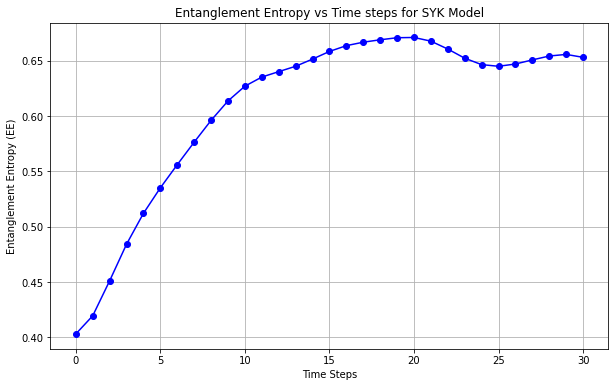

In [21]:
SYK_time_evolving_EE_v3(14, 1, 30, 1)

In [22]:
np.log(2) - 0.5 * (2 / 12)

0.6098138472266119

[(0.39252725920091225-0j), (0.4307187425526334+2.3623931890298093e-18j), (0.5079303257164269-1.7337671396999246e-18j), (0.5573788981131379-9.367025876837926e-18j), (0.5806283166573616+3.7218913310266956e-19j), (0.6026487940688579-1.896008838944085e-17j), (0.6291661580509087+5.301196649245006e-18j), (0.6519711656596281+1.4041393286964778e-17j), (0.661193170016572-6.256968322186016e-19j), (0.6634128990090512+5.679933834309865e-18j), (0.6693354618669066-7.396557007146526e-18j), (0.6766128053586187-1.4880344815309302e-18j), (0.6826059787143821-8.333861188000102e-18j), (0.6864367420226372-4.6348058634745375e-18j), (0.6845058957602259+2.7121057734439815e-18j), (0.6776617086727712-1.1170295304337616e-18j), (0.6747426882339678-3.3406681752426553e-18j), (0.6781103484370853-2.6467950991056767e-20j), (0.6801795922239022-2.2186271680007752e-17j), (0.6756250397349968+2.7663887449354797e-21j), (0.6675546804351331+1.5374826517854145e-19j), (0.6635827494537423-3.1506927720080835e-18j), (0.666953046185

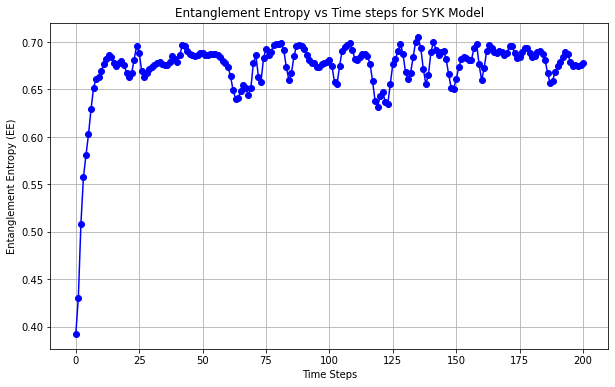

In [26]:
SYK_time_evolving_EE_v3(14, 1, 200, 1)

In [27]:
np.log(2) - 0.5 *(2/12)

0.6098138472266119

[(0.39868700234922827-0j), (0.662275409975301-4.3819742478162005e-20j), (0.6910495269630049+1.5813783730643983e-17j), (0.6938081831597076-1.7177019305417274e-18j), (0.6930243924181432+1.6789912933901048e-17j), (0.6853847341255617+8.717005151353283e-19j), (0.692246427646498-8.103745899388703e-20j), (0.6945751802194445-5.64047922379654e-19j), (0.6916586381553547-2.294110472334171e-19j), (0.6938581554144556+5.253787561828941e-19j), (0.6880046264574367-1.8231805859174103e-17j), (0.6732632277246409-1.1624100989721262e-17j), (0.6767715011382199-1.232118895384138e-18j), (0.6824047574571133-2.739367326205221e-19j), (0.6944497808084321-2.7630289692800026e-19j), (0.6859246336896563-1.871368684898561e-17j), (0.6826112935584727-4.371533070335683e-19j), (0.6871133390374473+1.544346852698888e-18j), (0.679460290954467+2.6052891551221287e-18j), (0.6753377341409307+5.471125888810538e-20j), (0.6763607790180433-1.9487276542895677e-18j), (0.65987702096522+1.2193493175960242e-19j), (0.681297950236629+1.550

c:\Users\Acer Aspire 5\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


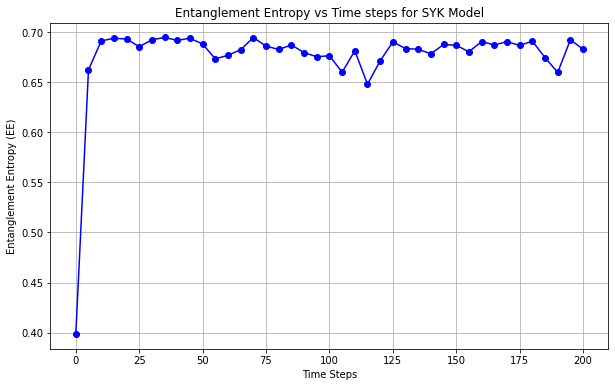

In [28]:
SYK_time_evolving_EE_v3(18, 1, 200, 5) 

In [ ]:
np.log(2)

0.6931471805599453

[(0.3604077840031109-0j), (0.36069046829430396+5.623839286516875e-19j), (0.36146186453945817+8.751171752249511e-19j), (0.3627297351547589+2.235577354331639e-19j), (0.3644978376066238+2.0023482452513935e-19j), (0.36676584280531915+3.503724241808879e-18j), (0.3695293295222839+1.3002721241242699e-18j), (0.3727798540192818+2.7026723671862646e-18j), (0.37650509135984567+3.667547587720237e-18j), (0.3806890424457148+2.2613210589680547e-19j), (0.38531229882569423-3.8266871840629845e-18j), (0.3903523558568584-1.0173359686421283e-17j), (0.39578396389983617+6.970657436807998e-20j), (0.401579506891114+2.9514303051823597e-18j), (0.40770939780322685-3.075729032238875e-18j), (0.41414248109458185-3.09116358833012e-18j), (0.42084643316367065+4.389907688073533e-21j), (0.42778815295236716+3.1095370640940953e-18j), (0.4349341360908473+6.735632035583278e-20j), (0.44225082725669634+3.1465145610047335e-18j), (0.44970494666486915+3.874901799776991e-19j), (0.45726378776347837+2.9808865801859816e-18j), (0.46489

c:\Users\Acer Aspire 5\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


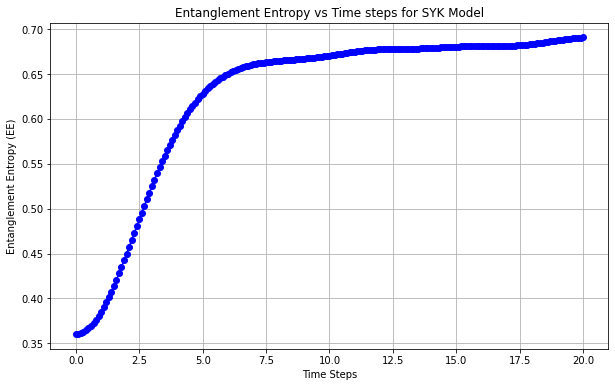

In [ ]:
SYK_time_evolving_EE_v3(18, 1 , 20, 0.1)

In [ ]:
np.log(2) 

0.6931471805599453

[(1.0195550153352466-0j), (1.0210443760677308+1.3547350891556111e-17j), (1.0252336409251874+2.0734929537611054e-17j), (1.0319893677889653-5.548372917388306e-18j), (1.0411208086848256-1.180459010648423e-17j), (1.052403951084873-1.2401130978021913e-17j), (1.0656011889385189-1.834625413760435e-18j), (1.080474809820944-1.6102450252150788e-18j), (1.0967951406614018-1.3151708757019152e-17j), (1.1143449665639225+6.312054958677803e-18j), (1.132921639850641-1.5426724759469916e-17j), (1.1523378549487922-1.563455179808421e-17j), (1.1724216851596323+1.917031291034847e-17j), (1.1930162226073524+1.4534917906315296e-17j), (1.2139790105331396-1.9408472658756693e-17j), (1.2351813718641678+2.1409090649071468e-17j), (1.2565076916467246-1.5787357933368003e-17j), (1.2778546855187214-3.150269789649261e-17j), (1.2991306716214266+3.431241602576277e-17j), (1.3202548540063823+1.3839731146906945e-17j), (1.3411566195359295-8.582798396951875e-18j), (1.3617748469113105+2.1405379578651052e-17j), (1.3820572256430006+

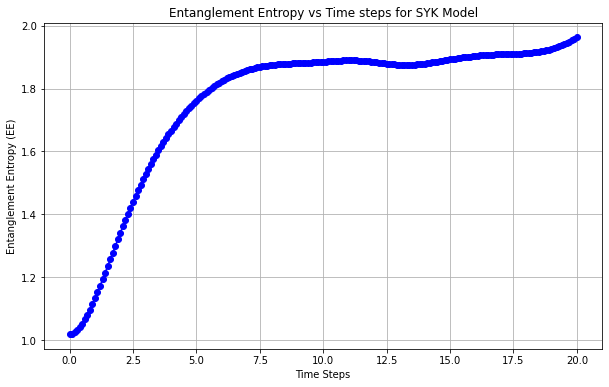

In [ ]:
SYK_time_evolving_EE_v3(18, 4, 20, 0.1)

[(1.0697645892538075-0j), (1.07611836314695-1.4555270038431397e-17j), (1.116087499545464-4.885124213497726e-18j), (1.179593160238473+1.4882809945821644e-17j), (1.2560735167544268+1.0155336654164654e-17j), (1.3371186357705864+1.4684640817909502e-17j), (1.4169020363498088+1.1511018744013467e-18j), (1.491957153612695-1.877604417008694e-17j), (1.5606304781940763+3.07780609304457e-17j), (1.6224148260180193-6.314142784060354e-17j), (1.6773357525905948+1.7705950707468487e-17j), (1.7255018495481202-4.033781366314854e-17j), (1.7668777766965353+6.166035393355477e-18j), (1.8012799737216358+2.7686863598886252e-17j), (1.8285245946407893+3.661201975058696e-17j), (1.8486291350926791+3.822200782400195e-17j), (1.86198534432956+3.9686477966294254e-17j), (1.8694437266084076-1.4100384783293816e-17j), (1.8722757965843706+6.734077893022116e-17j), (1.8720210550471963-3.482717625929235e-17j), (1.8702655472765544+8.505183908648544e-20j), (1.8684066028527446-7.933358038151937e-18j), (1.8674643835015206+2.130973

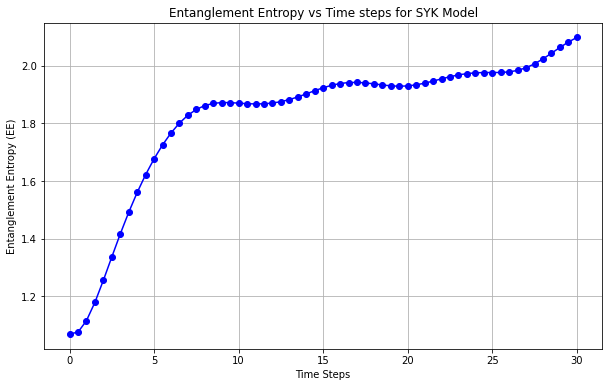

In [ ]:
SYK_time_evolving_EE_v3(18, 4, 30, 0.5)

[(1.1281091320910592-0j), (1.5315459493130847-5.055212416803347e-18j), (1.8354361494541698-8.841241611236431e-18j), (1.9743135373425007-5.766517043309006e-17j), (2.002348519117954-7.199583783509237e-17j), (2.0106633845746518-1.9044847283642463e-17j), (2.069779542040866+3.2713996981568533e-17j), (2.082669321832088+4.755380978813259e-18j), (2.097802098766274-4.5612334492445983e-17j), (2.156011995528224-1.8144939188518307e-17j), (2.1649076227140567-1.082410951466238e-17j), (2.2118440695520105+8.312959262760873e-18j), (2.225298630088817-1.1146778083125118e-17j), (2.2431220198480673+7.459794095053429e-18j), (2.262258451591165-1.3329568669439124e-17j), (2.221222078654453-1.7075874400935067e-17j), (2.187197307704132+9.673967510021633e-18j), (2.1583276349499747+4.64340864763768e-18j), (2.246408567507513-2.2190168915515418e-17j), (2.284974205027502-2.0268187735943527e-17j), (2.2845693234692104+1.6585028963016144e-17j), (2.2690647819013625-9.29272100607084e-17j), (2.2743131771059644+8.2856239101

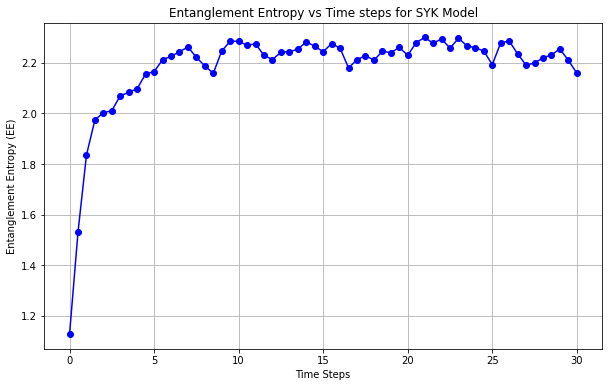

In [ ]:
SYK_time_evolving_EE_v3(20, 4, 30, 0.5)

In [ ]:
np.log(9)

2.1972245773362196

[(0.38937325304225784-0j), (0.4916105703162804+1.1179294886691141e-20j), (0.626110517215339+3.0828618878816463e-18j), (0.6688922029122784-3.226601950287205e-18j), (0.6702986761864465-1.8797101366699904e-17j), (0.676993666879053+9.473598391554204e-19j), (0.685004921069285-2.178346035800447e-18j), (0.6900559690026122+1.647471366781354e-17j), (0.6881656792350246-9.252435010604245e-20j), (0.687932602412572-3.191768525625632e-19j), (0.6996565647260936-1.6842070041552703e-17j), (0.6988967210690125-1.4792048361518927e-17j), (0.692328581938674+1.4138765204929467e-17j), (0.6893051406259283-1.666306040443976e-18j), (0.6770159954417267+1.5067467067363623e-20j), (0.680740044419555+2.3155050500355187e-19j), (0.6925637519013873+5.955863553972384e-18j), (0.6875613936557481+8.254099363610221e-18j), (0.6864391070339578-2.6789164699388344e-19j), (0.6904053839441073+5.442387533089561e-19j), (0.692943328253499+9.228431293791259e-20j), (0.6952204494834224-1.192045147444342e-19j), (0.695603081476332-2.12981

c:\Users\Acer Aspire 5\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


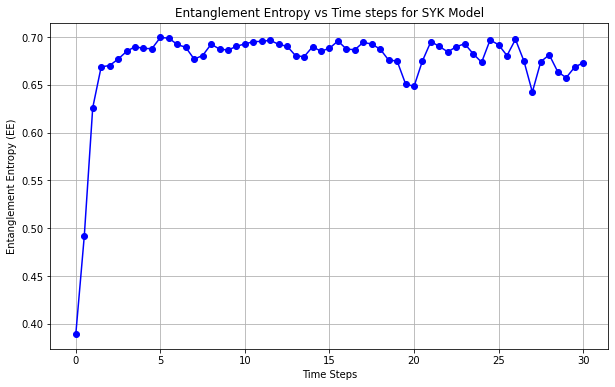

In [ ]:
SYK_time_evolving_EE_v3(16,1 , 30, 0.5)

In [ ]:
np.log(2)

0.6931471805599453

## From a small number of qubits to larger ones.

[(0.32782064387656284-0j), (0.32782064387656296-2.048789987663006e-20j), (0.3278206438765631-7.174931280012536e-18j), (0.3278206438765636-6.736103907504876e-18j), (0.3278206438765632-6.285636370433103e-18j), (0.32782064387656284+2.8670794476310866e-19j), (0.3278206438765629-1.7142657400314588e-19j), (0.32782064387656284-2.3917195797832405e-19j), (0.3278206438765634+1.6051329767032458e-17j), (0.3278206438765629+5.35854425117552e-17j), (0.3278206438765636-1.8098408885392306e-17j), (0.32782064387656346+2.287841573134908e-18j), (0.32782064387656296-1.955216112845334e-19j), (0.3278206438765633+2.1672948067937474e-17j), (0.3278206438765628-5.857489299739347e-19j), (0.32782064387656307-5.139228242735389e-17j), (0.3278206438765629-1.5059340246920603e-17j), (0.32782064387656284-3.9938601133886196e-19j), (0.32782064387656346-6.200412414659838e-17j), (0.3278206438765628-6.3551987347076495e-19j), (0.32782064387656296+1.9558489754237985e-19j), (0.327820643876563+7.841954962972746e-18j), (0.32782064

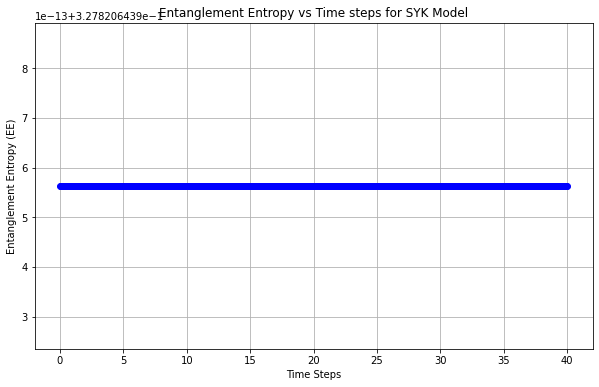

In [76]:
SYK_time_evolving_EE_v3(4, 1, 40, 0.1)

[(0.46806303917578124-0j), (0.48435788835026267-6.596471529053754e-19j), (0.49811551453318537+1.1297822740803325e-18j), (0.5093037096460051-2.0799848081259877e-18j), (0.5179345401904923+1.1307653401295742e-18j), (0.5240633278433833+6.56462086526468e-19j), (0.5277875569570316-3.9163443194787086e-18j), (0.529245668055935-1.2988393703685226e-17j), (0.5286156899621685-1.3161091269172777e-18j), (0.5261136497282234+5.443653800060509e-18j), (0.5219916780060643+3.3327637850892534e-18j), (0.5165356965816864+1.394546246826023e-17j), (0.5100625336601255+1.8559570454359686e-17j), (0.5029162615320093-6.457443561056429e-18j), (0.4954634939334961-7.943988892380691e-19j), (0.4880873257645746-2.089672096259372e-17j), (0.4811795638396321+1.8553658098471682e-17j), (0.4751309140226293-2.1550333219936813e-19j), (0.47031889958948675+1.663264604805159e-18j), (0.46709353451544916+3.8923823353218903e-17j), (0.4657611935159925-2.789486298568831e-18j), (0.46656768610973565-3.8825345705912385e-17j), (0.4696821443

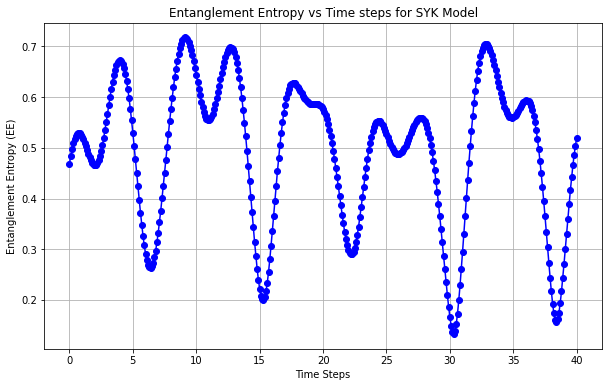

In [77]:
SYK_time_evolving_EE_v3(6, 1, 40, 0.1)

[(0.19881930205143075-0j), (0.1966909279507853-5.317102417984997e-19j), (0.20024845152697263-4.946125170513763e-19j), (0.20933382563630648-3.828256938276705e-18j), (0.22354232662392365-4.016270196105217e-18j), (0.24226626975896198-1.1166416191493969e-17j), (0.26475620233127906-1.3946720559238354e-18j), (0.2901822456966095+9.74201941316937e-18j), (0.31768496134765056-1.1267983047425602e-17j), (0.34641293194622413-3.122808928294738e-19j), (0.3755489243761525+8.79108854745207e-19j), (0.40432791733615514-4.054657853560553e-19j), (0.4320499231723094-1.3834723301860826e-17j), (0.45808965524847-1.2077298061587085e-17j), (0.4819042803781487+2.6553874307384113e-18j), (0.5030399133118183+2.447327818616022e-17j), (0.5211371395316531+1.7331858145034673e-17j), (0.5359356308713807-2.0845495244778994e-17j), (0.5472777876078676-1.8903997590820223e-17j), (0.5551112580730795+1.8690109246991073e-17j), (0.5594901233984672+5.552110526053689e-19j), (0.560574470759981+9.622632265527148e-19j), (0.558627999627

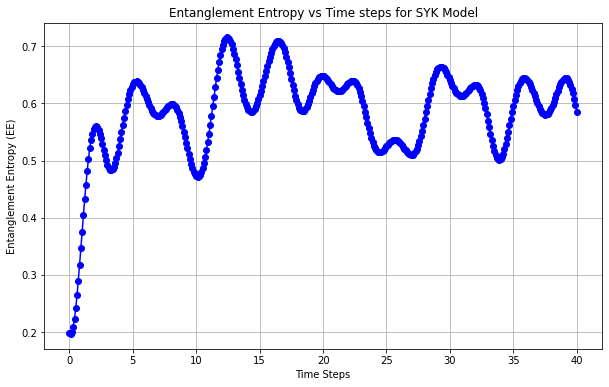

In [78]:
SYK_time_evolving_EE_v3(8, 1, 40, 0.1)

[(0.3716135301806031-0j), (0.376806828012424+1.2180238707312307e-19j), (0.39060488877854643-2.7871043113673335e-18j), (0.4103766760636135-1.2252029959140934e-17j), (0.4328620148657656-2.4072880052019776e-19j), (0.4548312114368597-1.1362236706164438e-17j), (0.47357387015892294-1.0697512005806307e-17j), (0.4871787962014448+1.0026726021815186e-18j), (0.4946423278767609+1.980849350728532e-17j), (0.49585684175552225-8.419329529813126e-20j), (0.4915212638127071-3.2594552094264124e-19j), (0.4830012591953957-2.1017349982937503e-17j), (0.4721539243277293-1.1307552928700366e-19j), (0.46112126165930334+1.415582173236666e-19j), (0.4520907135379624+1.997066741729801e-19j), (0.44702507579129913+1.2827546595042115e-19j), (0.4473842389949585-1.1466528096727445e-20j), (0.45389373585986104-6.915717037963112e-20j), (0.46643574457493403-4.6889132258390404e-17j), (0.48411447610542985-1.240486449688404e-17j), (0.5054799339942081-9.981451784022393e-18j), (0.5288300097455133+2.6634723825095694e-19j), (0.55249

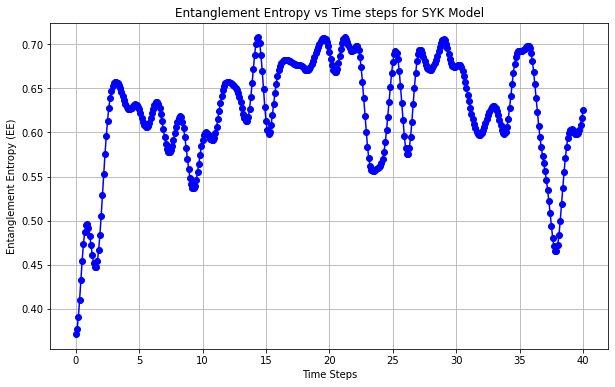

In [79]:
SYK_time_evolving_EE_v3(10, 1, 40, 0.1)

[(0.4022755483123339-0j), (0.4054426839852684-1.676819010490527e-18j), (0.40949041669725894+5.928823364042491e-22j), (0.4142933455321367+6.681222728723839e-18j), (0.41971329000512525-6.407304314452521e-18j), (0.4256054286310427-1.3770386400943117e-17j), (0.4318246094745191-6.978656918552907e-18j), (0.43823129075874273-7.087785051581112e-19j), (0.44469668008616325-1.2244134931670424e-17j), (0.4511067917262469+4.912157184993111e-20j), (0.45736530135193093+2.494211732710813e-17j), (0.46339522184078996-1.1632071738521585e-17j), (0.4691395364158-2.3108506313419393e-17j), (0.4745609986956616+1.2273707713136675e-18j), (0.4796413414776205-2.2797148765370928e-17j), (0.4843801297145599-1.1688732296100183e-20j), (0.4887934532822529-2.4327242452497498e-17j), (0.4929125888211381+2.209861924533295e-17j), (0.49678267600723425+2.2373683856067417e-17j), (0.5004613627873536+2.246062333853022e-17j), (0.504017289203246+4.977922746537137e-20j), (0.5075282151720493-1.7793088209026173e-18j), (0.5110785698351

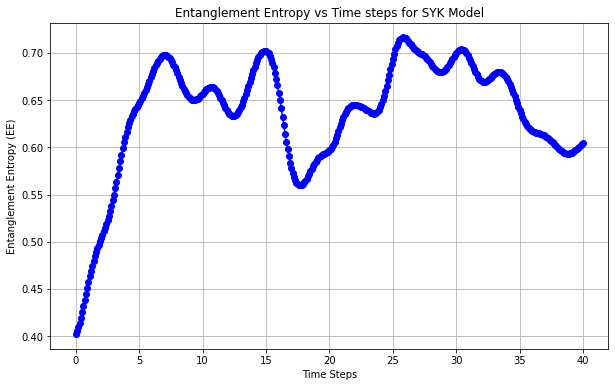

In [80]:
SYK_time_evolving_EE_v3(12, 1, 40, 0.1)

[(0.39773669228926534-0j), (0.40068098373972716-1.6131258417082134e-18j), (0.40767623141828424+4.795165329851526e-19j), (0.4181160382000383-7.140528388612742e-18j), (0.43119438794459886-5.941087469052118e-18j), (0.4460069161517308+1.984590080677752e-18j), (0.4616535054984874+6.35308685083831e-20j), (0.4773268871778338-1.0557325667878926e-17j), (0.49237795042644017+1.988330565656813e-17j), (0.5063539953873921+1.9158570590893098e-17j), (0.5190101222833512+3.5631901756287474e-17j), (0.530296460263495-1.925290758526776e-17j), (0.5403255652803548-1.6018770068034528e-17j), (0.5493255331065093+2.7325114052920484e-19j), (0.5575853648024484-1.5396621105914484e-17j), (0.5653997711780535-2.5829995896303532e-18j), (0.5730205958130891+1.6196282412033043e-17j), (0.5806210461599501+3.006131681373269e-17j), (0.5882768351838609+3.589579469343745e-19j), (0.595965415931524-5.982474957150472e-18j), (0.6035813675892168-1.3552158744306996e-17j), (0.6109634357398532+1.3356373734686505e-19j), (0.6179273355486

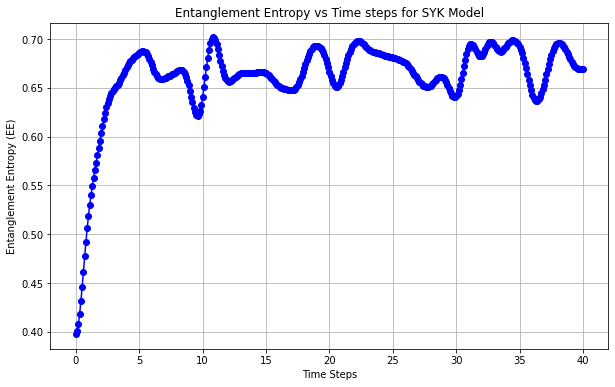

In [81]:
SYK_time_evolving_EE_v3(14, 1, 40, 0.1)

[(0.3537015965014719-0j), (0.35030077563431344+2.554408926648942e-18j), (0.35832597976592584+1.4037408332549823e-18j), (0.3777645608762006+1.2263917560579034e-20j), (0.4068356585337495+2.507812258031768e-17j), (0.4425822451657625+5.4230864525122796e-18j), (0.4816018112706728-2.5038023828467824e-18j), (0.5206393763843251+6.239132625911354e-18j), (0.5569750027815177-4.857681064143996e-18j), (0.5886435490136988-2.9047064907583646e-18j), (0.6145276055468847-3.1785631232248695e-18j), (0.6343384720054785-2.6418210309147388e-18j), (0.6484909988890042+4.646586600503496e-18j), (0.6578942839003852+8.588280979713084e-18j), (0.6637054315738622+2.516252412640429e-19j), (0.6671045414597874-1.988020272249356e-17j), (0.669133595073039-1.2350736460864119e-17j), (0.6706092237203432-8.09085380710186e-18j), (0.6720920935878635-2.1631251000731786e-19j), (0.6738893577878918-3.032585876968464e-18j), (0.676077462390803-2.295680965039178e-18j), (0.6785446208210739-7.708172719030448e-18j), (0.6810537333831792+4

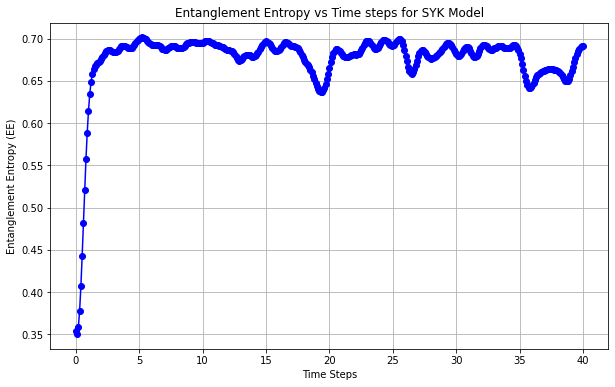

In [82]:
SYK_time_evolving_EE_v3(16, 1, 40, 0.1)

[(0.36244681202156565-0j), (0.36929576490692895+3.2804560414284432e-18j), (0.38978284621995957-8.307800041072624e-20j), (0.42116024179450945+1.6334058355267255e-18j), (0.4587273960693984-6.969531705256462e-19j), (0.4974710999213088+2.262788500848949e-19j), (0.53335935657372-1.1865666021366819e-18j), (0.563942191703365+1.415264758467981e-17j), (0.5883340008410867+3.3188068355295283e-18j), (0.6068174034810395+3.989380870967995e-18j), (0.6203269870455322+5.6259740493234814e-18j), (0.6300099155543146+5.062052122178709e-18j), (0.6369514645242274-4.931514313980388e-18j), (0.6420482829697771+9.412853568690267e-18j), (0.6459659150398847+1.8131477346337857e-19j), (0.6491377410969494-4.192570843861612e-18j), (0.6518014616294765+2.2044895766508847e-20j), (0.6540751299989702-1.413478257406155e-17j), (0.6560455494621564+2.1957608591531374e-17j), (0.6578189357940778+7.377041088007979e-18j), (0.6595030704087816-1.7689328596419328e-17j), (0.6611440909831512+2.0611129229899264e-17j), (0.662683176799501

c:\Users\Acer Aspire 5\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


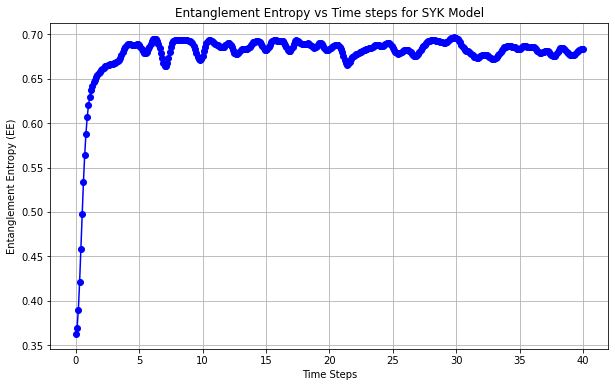

In [ ]:
SYK_time_evolving_EE_v3(18, 1, 40, 0.1)

[(0.3808707370941279-0j), (0.4691712323465271+1.5189121038671945e-19j), (0.5879184531424848-9.846143105537979e-18j), (0.6334123664261808+8.077274983220535e-18j), (0.65168472196407+4.246906563204444e-18j), (0.6618906430196899-2.078488692309698e-17j), (0.6608352597198311-8.752039067066259e-20j), (0.6679275979143129-9.17481787962633e-18j), (0.672468178391272-9.383251090963596e-20j), (0.6771056289578643-1.3283965699351465e-17j), (0.6804851598690151-2.604973349640571e-18j), (0.6787166883496096+7.864149885628461e-19j), (0.6852387318602702-1.4649420819016729e-19j), (0.6823033227987219-6.003096186372756e-21j), (0.6737772841462817+2.2298512622269467e-20j), (0.6850572468751333+1.3122194800222401e-19j), (0.6913597277459205+1.3318796003671619e-19j), (0.690954130166127-4.707394741320492e-19j), (0.6913102116990593-1.554637733138233e-17j), (0.6936252585777681-9.265268168472009e-20j), (0.6928222917481717+2.999000746833733e-20j), (0.6853151357531395-1.482991447270893e-17j), (0.6921030852617036+1.869185

c:\Users\Acer Aspire 5\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


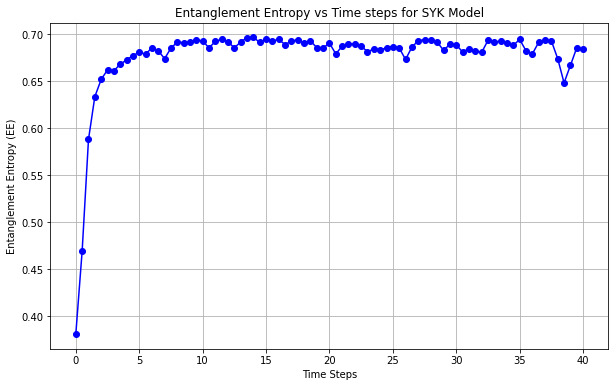

In [ ]:
SYK_time_evolving_EE_v3(20, 1, 40, 0.5)

In [ ]:
np.log(2)

0.6931471805599453

## With Interpolation/Curve-fit and a corrected value from Page's Theorem



In [ ]:
import numpy as np
import math
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def SYK_time_evolving_EE_v4_interpolation(Nfermions, n_A, final_time, interval_time):
    
    # Make a time step for later use, when calculating the entanglement entropy of the SYK
    # model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)
    nQubits = int(Nfermions // 2)

    # And make a list for the result of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)
    
    # Make the Coupling constants for each of the fermions for the Hamiltonian
    std = np.sqrt(math.factorial(3) * ((0.4)**2 / (Nfermions**(3))))
    J = np.random.normal(loc=0, scale=std, size=(1))
    H_syk = Hamiltonian_SYK_v3(Nfermions, J)
    
    # A time loop over the time ran from the initial time to final time.
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=H_syk, time=time_i) @ SYK_initial_state

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)
    
    # Perform interpolation using scipy.interpolate.interp1d
    interpolation_function = interp1d(time_steps, EE_final_list, kind='cubic')
    
    # Generate new time points for smooth interpolation curve
    time_interpolated = np.linspace(0, final_time, num=500)
    EE_interpolated = interpolation_function(time_interpolated)

    # Plotting the original EE values and the interpolated curve
    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, EE_final_list, 'o', label='Original EE Data')
    plt.plot(time_interpolated, EE_interpolated, '-', label='Interpolated EE Curve (Cubic)')
    plt.xlabel('Time')
    plt.ylabel('Entanglement Entropy (EE)')
    plt.title('Entanglement Entropy vs. Time')
    plt.legend()
    plt.show()

    return EE_final_list, interpolation_function



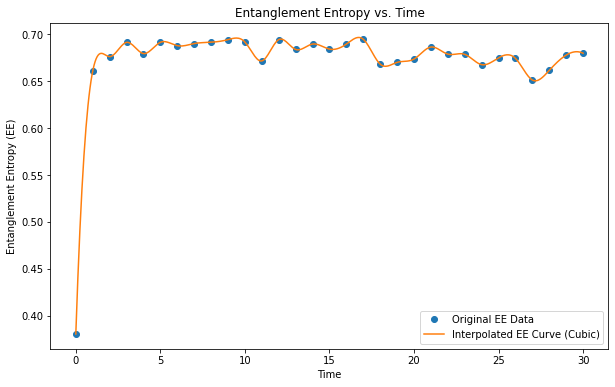

([(0.38033227851703977-0j),
  (0.6608118872902335+1.6965777418914692e-17j),
  (0.676235468995315+9.729030781720508e-18j),
  (0.6914482127719168-3.924961565820317e-19j),
  (0.679527198394249+2.8005538926988528e-18j),
  (0.6915184867797364+6.47632565211659e-19j),
  (0.6879516123178536+2.06983296100195e-19j),
  (0.6901812150694727+1.7948693928318355e-17j),
  (0.691590017503118+2.3524615446100537e-19j),
  (0.6943560277533147+5.1216619494191835e-20j),
  (0.6917989389594483-1.6673264214620966e-17j),
  (0.6716808789074631+8.396369523298188e-18j),
  (0.6943856850658867-6.184046501687046e-19j),
  (0.6839192757460422-1.855803424931288e-18j),
  (0.6896702189833726+1.7329845571474675e-17j),
  (0.6842806254951663-6.01480476659785e-18j),
  (0.6896206423316764+1.2211001402380987e-17j),
  (0.6947650658941613+4.164812162394611e-18j),
  (0.6682607099453816-2.842628019642434e-18j),
  (0.6701186166526761+2.743622891266796e-19j),
  (0.6736400848806834+1.1667288029431386e-17j),
  (0.6864676974243774-1.52781

In [ ]:
SYK_time_evolving_EE_v4_interpolation(18, 1, 30, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def SYK_time_evolving_EE_v5_curvefit(Nfermions, n_A, final_time, interval_time, curve_deg):
    # Time steps for the entanglement entropy of the SYK model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)
    nQubits = int(Nfermions // 2)

    # Initialize list for the results of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)

    # Make the Coupling constants for each of the fermions for the Hamiltonian
    std = np.sqrt(math.factorial(3) * ((1)**2 / (Nfermions**(3))))
    J = np.random.normal(loc=0, scale=std, size=(1))
    
    # Generate the Hamiltonian for the SYK model
    H_syk = Hamiltonian_SYK_v3(Nfermions, J)
    
    # Time loop: evolve the system and calculate entanglement entropy at each time step
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=H_syk, time=time_i) @ SYK_initial_state

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)

    # Plot EE as a function of time
    plt.plot(time_steps, EE_final_list, 'o', label='EE vs Time')
    
    # Fit a polynomial (2nd degree as an example)
    coefficients = np.polyfit(time_steps, EE_final_list, curve_deg)
    poly = np.poly1d(coefficients)
    
    # Generate a smooth curve for the fit
    smooth_time = np.linspace(time_steps[0], time_steps[-1], 500)
    smooth_EE = poly(smooth_time)
    
    plt.plot(smooth_time, smooth_EE, '-', label=f"Best-fit curve")
    plt.xlabel('Time')
    plt.ylabel('Entanglement Entropy')
    plt.title('Time-evolution of Entanglement Entropy in SYK Model')
    plt.legend()
    plt.show()

    return coefficients  # Return the coefficients of the best-fit curve

In [1]:
SYK_time_evolving_EE_v5_curvefit(18, 1, 30, 0.5, 4)

NameError: name 'SYK_time_evolving_EE_v5_curvefit' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

def SYK_time_evolving_EE_v6_fitting(Nfermions, n_A, final_time, interval_time):
    """
    Computes the time evolution of the entanglement entropy in the SYK model and fits it to the equation y = log(n_A) + b.
    
    Parameters:
    Nfermions (int): Number of fermions in the SYK model.
    n_A (int): Size of the subsystem A.
    final_time (float): The final time up to which to evolve the system.
    interval_time (float): The time interval between measurements.

    Returns:
    b (float): The fitted value of the constant b.
    """

    # Make a time step for later use, when calculating the entanglement entropy of the SYK model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)
    nQubits = int(Nfermions // 2)

    # And make a list for the result of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)
    
    # Make the Coupling constants for each of the fermions for the Hamiltonian
    std = np.sqrt(math.factorial(3) * ((0.4)**2 / (Nfermions**(3))))
    J = np.random.normal(loc=0, scale=std, size=(1))
    H_syk = Hamiltonian_SYK_v3(Nfermions, J)
    
    # A time loop over the time ran from the initial time to final time.
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=H_syk, time=time_i) @ SYK_initial_state

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)
    
    # Plotting EE vs Time
    plt.plot(time_steps, EE_final_list, label='EE vs Time')
    
    # Define the fitting function
    def fit_function(n_A, b, t):
        return np.log(n_A * t) + b
    
    # Fit the data to the equation y = log(n_A) + b
    popt, pcov = curve_fit(fit_function, [n_A]*len(time_steps), EE_final_list)
    b = popt[0]
    
    # Plot the fitted function
    plt.plot(time_steps, fit_function(np.array([n_A]*len(time_steps)), b), 'r--', label=f'Fitted: y = log(n_A) + {b:.3f}')
    plt.xlabel('Time')
    plt.ylabel('Entanglement Entropy')
    plt.legend()
    plt.show()

    print(f'Fitted value of b: {b}')
    
    return b

# Example Usage (this assumes that the helper functions are defined elsewhere in your code):
# Nfermions = 8
# n_A = 4
# final_time = 10
# interval_time = 0.1
# b_value = SYK_time_evolving_EE_v3(Nfermions, n_A, final_time, interval_time)


C:\Users\Acer Aspire 5\AppData\Local\Temp\ipykernel_5912\2333308321.py:49: RuntimeWarning: invalid value encountered in log
  return np.log(n_A * t) + b


TypeError: fit_function() missing 1 required positional argument: 't'

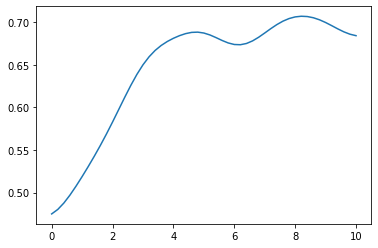

In [ ]:
SYK_time_evolving_EE_v6_fitting(Nfermions=12, n_A=1, final_time=10, interval_time=0.2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

def SYK_time_evolving_EE_v6_fitting_2(Nfermions, n_A, final_time, interval_time):
    """
    Computes the time evolution of the entanglement entropy in the SYK model and fits it to the equation y = log(n_A * time) + b.
    
    Parameters:
    Nfermions (int): Number of fermions in the SYK model.
    n_A (int): Size of the subsystem A.
    final_time (float): The final time up to which to evolve the system.
    interval_time (float): The time interval between measurements.

    Returns:
    b (float): The fitted value of the constant b.
    """

    # Make a time step for later use, when calculating the entanglement entropy of the SYK model as a function of time.
    time_steps = np.arange(0, (final_time + interval_time), interval_time)
    nQubits = int(Nfermions // 2)

    # And make a list for the result of the EE as a function of time
    unitary_operator_dict = {}
    EE_final_list = []

    # Make the initial state
    SYK_initial_state = psi_initial_random_state_uniform(nQubits=nQubits, min_val=0, max_val=1)
    
    # Make the Coupling constants for each of the fermions for the Hamiltonian
    std = np.sqrt(math.factorial(3) * ((0.4)**2 / (Nfermions**(3))))
    J = np.random.normal(loc=0, scale=std, size=(1))
    H_syk = Hamiltonian_SYK_v3(Nfermions, J)
    
    # A time loop over the time ran from the initial time to final time.
    for time_i in time_steps:
        unitary_operator_dict[time_i] = unitary_operator_SYK(coupling_constant_initial=H_syk, time=time_i) @ SYK_initial_state

    for time, statevectors in unitary_operator_dict.items():
        final_ee = Entanglement_Entropy_COMBINED_uniform(statevectors, n_A)
        EE_final_list.append(final_ee)
    
    # Plotting EE vs Time
    plt.plot(time_steps, EE_final_list, label='EE vs Time')
    
    # Define the fitting function
    def fit_function(t, b):
        return np.log(n_A * t) + b
    
    # Fit the data to the equation y = log(n_A * time) + b
    popt, pcov = curve_fit(fit_function, time_steps[1:], EE_final_list[1:])  # Avoid log(0) by starting from the second time step
    b = popt[0]
    
    # Plot the fitted function
    plt.plot(time_steps, fit_function(time_steps, b), 'r--', label=f'Fitted: y = log(n_A * time) + {b:.3f}')
    plt.xlabel('Time')
    plt.ylabel('Entanglement Entropy')
    plt.legend()
    plt.show()

    print(f'Fitted value of b: {b}')
    
    return b

# Example Usage (this assumes that the helper functions are defined elsewhere in your code):
# Nfermions = 8
# n_A = 4
# final_time = 10
# interval_time = 0.1
# b_value = SYK_time_evolving_EE_v6_fitting(Nfermions, n_A, final_time, interval_time)


C:\Users\Acer Aspire 5\AppData\Local\Temp\ipykernel_5912\3377155070.py:49: RuntimeWarning: divide by zero encountered in log
  return np.log(n_A * t) + b


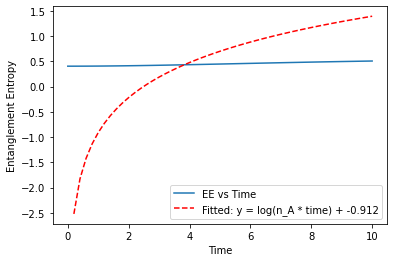

Fitted value of b: -0.9115733275950704


-0.9115733275950704

In [ ]:
SYK_time_evolving_EE_v6_fitting_2(16, 1, 10, 0.2)

In [ ]:
-0.5 *(2/14)

-0.07142857142857142

C:\Users\Acer Aspire 5\AppData\Local\Temp\ipykernel_13024\243794513.py:16: RuntimeWarning: divide by zero encountered in log
  return min(np.log(d_A), np.log(d_B))


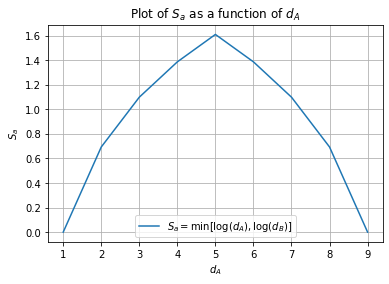

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def S_a(d_A, N):
    """
    Computes S_a = min[log(d_A), log(d_B)] where d_B = N - d_A.
    
    Parameters:
    d_A (int): Size of subsystem A.
    N (int): Total system size.

    Returns:
    float: The value of S_a.
    """
    d_B = N - d_A
    return min(np.log(d_A), np.log(d_B))

# Define the total system size N
N = 10


# Generate d_A values ranging from 1 to N-1 (as d_A cannot be 0 or N)
d_A_values = np.arange(0, N+1)

# Compute the corresponding S_a values
S_a_values = [S_a(d_A, N) for d_A in d_A_values]

# Plot the results
plt.plot(d_A_values, S_a_values, label=r'$S_a = \min[\log(d_A), \log(d_B)]$')
plt.xlabel(r'$d_A$')
plt.ylabel(r'$S_a$')
plt.title(r'Plot of $S_a$ as a function of $d_A$')
plt.legend()
plt.grid(True)
plt.show()
